In [ ]:
import numpy as np
from keras.utils import to_categorical, plot_model
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, SimpleRNN


In [ ]:
from keras.datasets import mnist
#dataset loading
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
#no. of labels
num_labels=len(np.unique(y_train))

In [ ]:
num_labels

10

In [ ]:
#convertion to one-hot vector
y_train=to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
print(y_train)


[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [ ]:
print(y_train[0]) #the results infer that at the 1st row, '5' is assigned therfore it is denoted '1' in the 5th index and others '0'


[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
print(y_train[6])


[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
print(y_test)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
#resize and normalise
image_size= x_train.shape[1]
x_train=np.reshape(x_train,[-1,image_size,image_size])
print(x_train.shape)
x_test=np.reshape(x_test,[-1,image_size,image_size])
print(x_test.shape)
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
#network parameters
input_shape=(image_size,image_size)
batch_size=128
units=28
dropout=0.2

In [ ]:
#model build - simple RNN
model=Sequential()
model.add(SimpleRNN(units=units,input_shape=input_shape))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 28)                1596      
                                                                 
 dense_2 (Dense)             (None, 10)                290       
                                                                 
 activation_2 (Activation)   (None, 10)                0         
                                                                 
Total params: 1,886
Trainable params: 1,886
Non-trainable params: 0
_________________________________________________________________


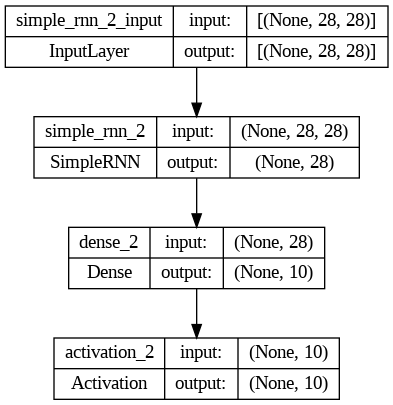

In [ ]:
plot_model(model,to_file='rnn-mnist.png',show_shapes=True)

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=15,batch_size=batch_size)

Epoch 1/15
469/469 [==============================] - 10s 22ms/step - loss: 0.9846 - accuracy: 0.6726
Epoch 2/15
469/469 [==============================] - 13s 27ms/step - loss: 0.8439 - accuracy: 0.7306
Epoch 3/15
469/469 [==============================] - 16s 35ms/step - loss: 0.7590 - accuracy: 0.7676
Epoch 4/15
469/469 [==============================] - 9s 20ms/step - loss: 0.6800 - accuracy: 0.8007
Epoch 5/15
469/469 [==============================] - 17s 36ms/step - loss: 0.6180 - accuracy: 0.8222
Epoch 6/15
469/469 [==============================] - 13s 28ms/step - loss: 0.5659 - accuracy: 0.8398
Epoch 7/15
469/469 [==============================] - 16s 34ms/step - loss: 0.5221 - accuracy: 0.8523
Epoch 8/15
469/469 [==============================] - 12s 26ms/step - loss: 0.4988 - accuracy: 0.8595
Epoch 9/15
469/469 [==============================] - 11s 22ms/step - loss: 0.4768 - accuracy: 0.8646
Epoch 10/15
469/469 [==============================] - 12s 25ms/step - loss: 0.4488

In [ ]:
loss, acc =model.evaluate(x_test,y_test,batch_size-batch_size)
print('\nTest accuracy: %.1f%%' % (100.0*acc))

313/313 [==============================] - 2s 5ms/step - loss: 0.3435 - accuracy: 0.9076

Test accuracy: 90.8%
